In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train=pd.read_csv('../input/titanic/train.csv')


In [90]:
X_test=pd.read_csv('../input/titanic/test.csv')
y_test=pd.read_csv('../input/titanic/gender_submission.csv')

We have already read the data and now its time for data preprocessing.Looking at the various mean values and also finding if there is any null value in our dataset and various other steps .


In [39]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


From here we can see that there are null values in our Cabin and Age column but a better way to see this is by plotting heatmap using seaborn lib or by just getting info about the datset.

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


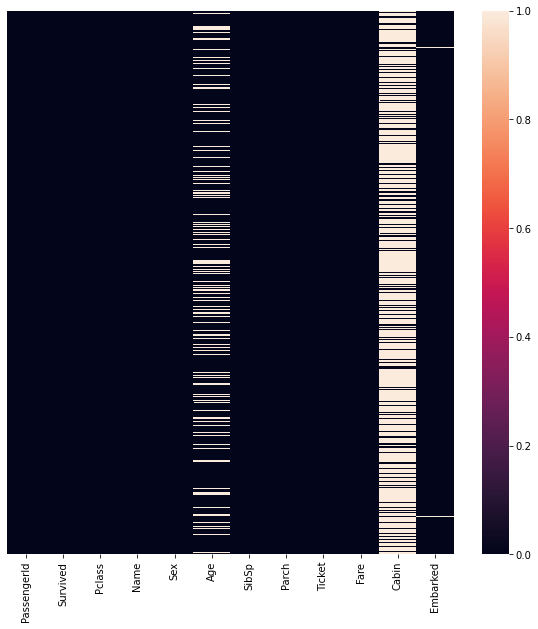

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)


From here we can see that there are null values in **Embarked column** as well and we might want to remove this null values for a better result.

So lets deal with the Age dataset first and try to replace these NaN values with some values that can do well.One way to do so is to just replace the values with the mean of the ages of all but that will not be a good option as you will see further how the value changes. 

Lets plot some of the graphs and identify the relationship of age with other features.

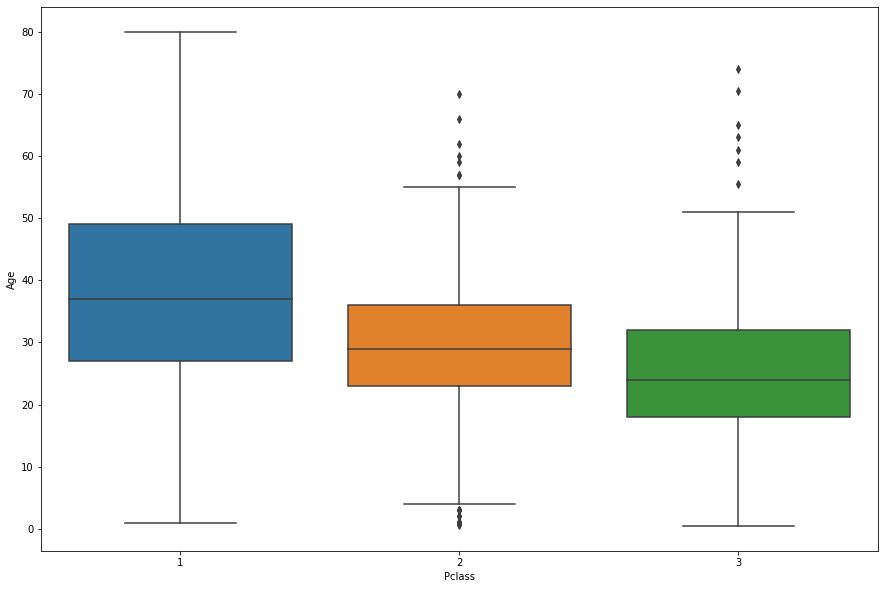

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot('Pclass','Age',data=train)

From this we can see that the average age for Pclass 1 is around 38 where as for other classes its 29 and 23 respectively. So just by doing the mean we would have replaced the value to 29.6 which would have not performed as good as this . So lets replace the NaN values with the values we found for each class.

In [48]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1] 
    
    if pd.isnull(Age) :
        if Pclass==1 :
            return 38
        elif Pclass==2:
            return 29
        else :
            return 24
    else :
        return Age
                

In [49]:
train['Age']=train[['Age','Pclass']].apply(Age_1,axis=1)

Here we have replaced the values of Age column with their respective mean values.

Now by seeing the data we can see that Passengerid, Cabin , Ticket, and Name is of no use for determining whether he survived or not .So lets just remove them from our train as well as test dataset.


In [50]:
train.drop(['PassengerId','Ticket','Cabin','Name'],inplace=True,axis=1)

In [91]:
X_test.drop(['PassengerId','Ticket','Cabin','Name'],inplace=True,axis=1)

Now there is NaN value in Embarked column and that also only two of them . So Just dropping these two values wont make much difference in our dataset.

In [52]:
train=train.dropna(axis=0,how='any')

Lets see if our dataset contains any NaN values or not . 

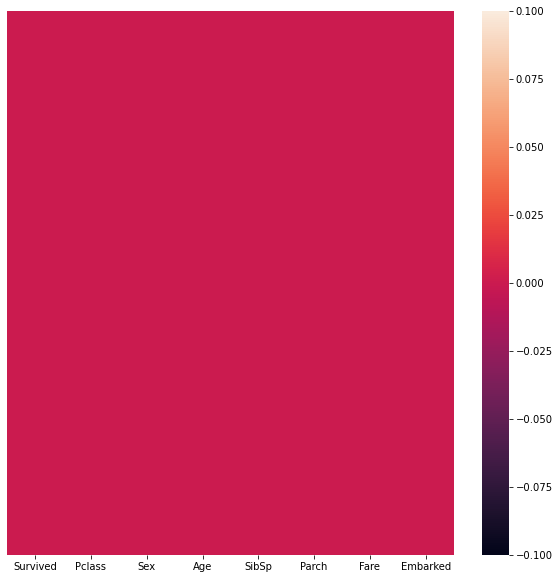

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)


Here we will also have to remove the NaN values and replace it will other values and repeat the same steps on your X_test dataset also bcz it also contains null values. I have just done that in one cell but you can do it by following previous steps . 

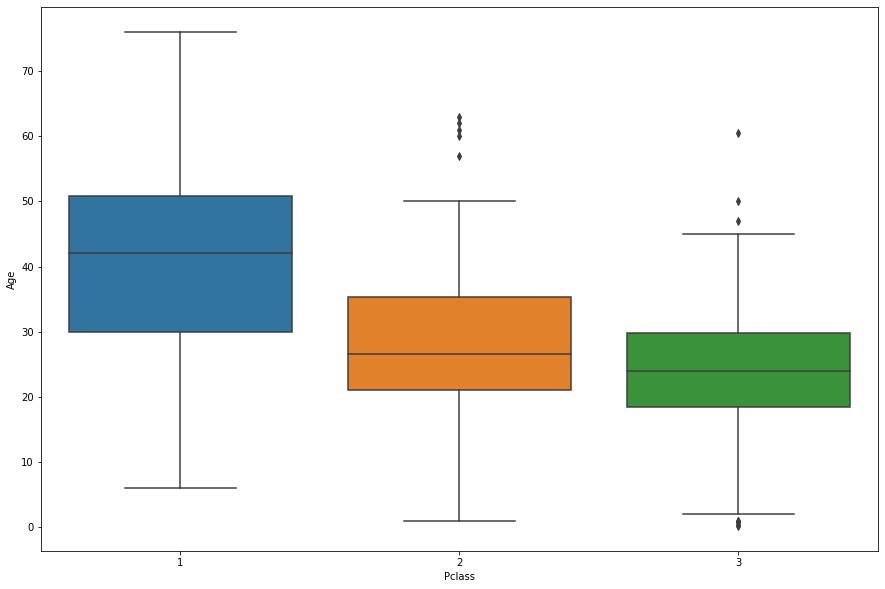

In [92]:
plt.figure(figsize=(15,10))
sns.boxplot('Pclass','Age',data=X_test)


In [93]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1] 
    
    if pd.isnull(Age) :
        if Pclass==1 :
            return 42 
        elif Pclass==2:
            return 25
        else :
            return 22
    else :
        return Age
                

In [94]:
X_test['Age']=X_test[['Age','Pclass']].apply(Age_1,axis=1)

Now 

 Lets start visualising it in depth and get some insight out of it .

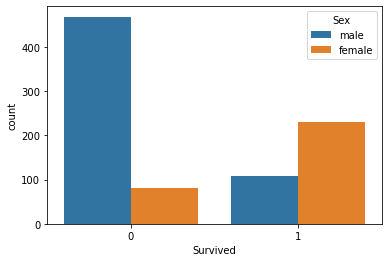

In [59]:
sns.countplot('Survived',hue='Sex',data=train)


This clearly shows that a lot of females survived over males .

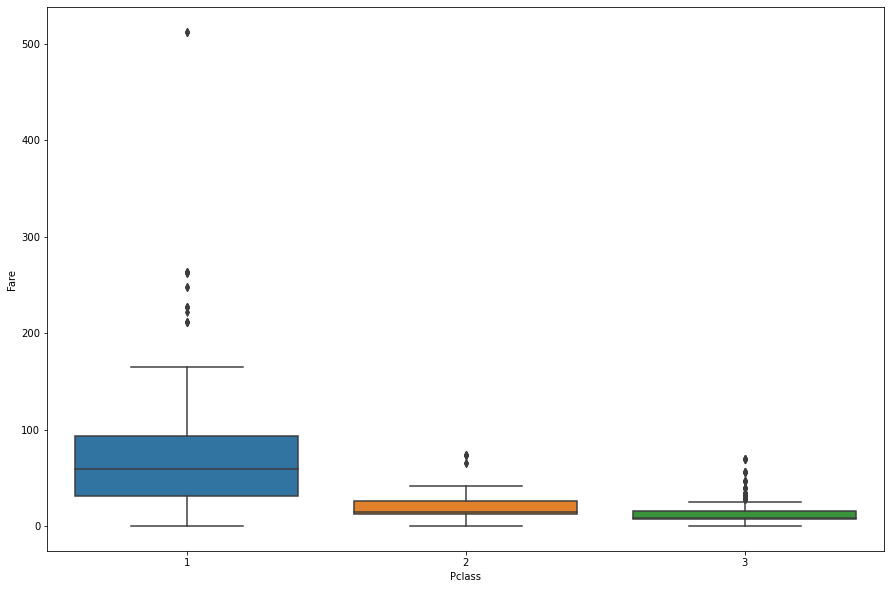

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot('Pclass','Fare',data=train)

This tells us that for Pclass 1 they actually paid higher money while other classes didnt pay much money but also Pclass 1 and 3 have a lotmore outliers that would led to overfitting so it must be taken care off.

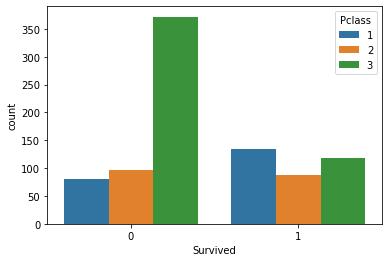

In [70]:
sns.countplot('Survived',hue='Pclass',data=train)

Survival rate of Pclass is much more than other but for Pclass 2 is almost the same and so by seeing this we cant just ignore the Fare feature and drop it and it is very crucial for further predictions. 

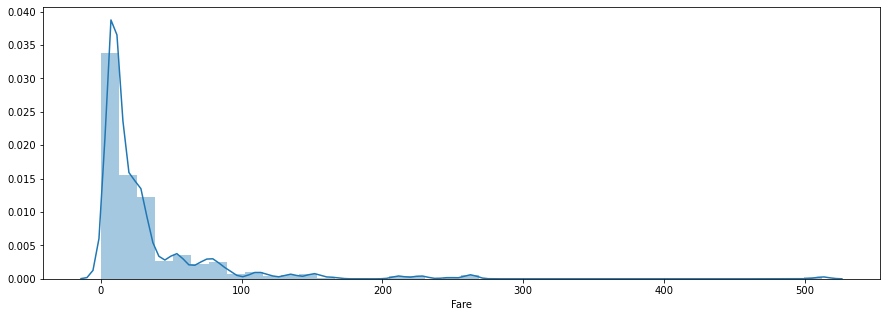

In [65]:
plt.figure(figsize=(15,5))
sns.distplot(train['Fare'],bins=40)

This doesnt look like a proper gaussian curve and might tend to overfit the curve as it has very less values of people survived for fare greater than 80$.

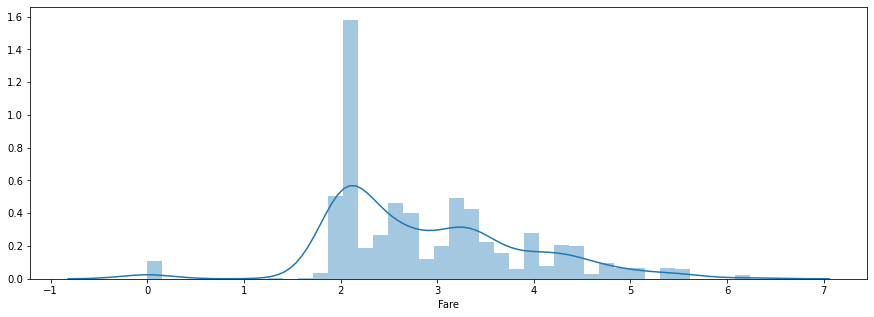

In [66]:
train_fare = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(15,5))
sns.distplot(train_fare,bins=40)


Now we can see that the curve it equally distributed and will perfrom well under any classifier.


In [73]:
fare=train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

Replacing the Fare values by their logerithmic values

Now lets replace the Embarked and Sex columns with their binary values


In [74]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
emb=pd.get_dummies(train['Embarked'],drop_first=True)

In [75]:
y_train=train['Survived']
train.drop(['Embarked','Sex','Survived','Fare'],inplace=True,axis=1)

The dummies are created and now the original dataset we need to concate with the newly created one 

In [76]:
X_train=pd.concat([train,sex,emb,fare],axis=1)

In [96]:
y_test.drop('PassengerId',inplace=True,axis=1)

In [89]:
X_train

,Pclass,Age,SibSp,Parch,male,Q,S,Fare
0,3,22.0,1,0,1,0,1,1.981001
1,1,38.0,1,0,0,0,0,4.266662
2,3,26.0,0,0,0,0,1,2.070022
3,1,35.0,1,0,0,0,1,3.972177
4,3,35.0,0,0,1,0,1,2.085672
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,1,0,1,2.564949
887,1,19.0,0,0,0,0,1,3.401197
888,3,24.0,1,2,0,0,1,3.154870
889,1,26.0,0,0,1,0,0,3.401197


This is our final dataset for training the dataset and same goes for y_train .

I have to perform the following steps on X_test i.e. test data as well bcz even it contains some of the data like this 
.Repeat the steps


In [97]:
test_fare=X_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [98]:
test_sex=pd.get_dummies(X_test['Sex'],drop_first=True)
test_emb=pd.get_dummies(X_test['Embarked'],drop_first=True)
X_test.drop(['Embarked','Sex','Fare'],inplace=True,axis=1)
X_test=pd.concat([X_test,test_sex,test_emb,test_fare],axis=1)

In [99]:
Y_test=pd.concat([X_test,test_sex,test_emb,test_fare,y_test],axis=1)
Y_test=Y_test.dropna(axis=0,how='any')


In [102]:
y_test=Y_test['Survived']

Now we only problm we would face is that our X_test contains 417 rows of data whereas our y_test contains 418 rows of data . So instead initiall while removing the NaN value from fare dataset we would have just used OneHotEncoder for categorical data and IterativeImputer for Numerical data to solve it . But it just one value other way is to just concate it and then drop that value ,  so that it will remove it from our y_test dataset as well.

Now our dataset preprocessing and visualisation is complete and now its time to use the proper method to train and test the dataset to get the best output.

# Using Logistic Regression Algorithm 

In [106]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [107]:
lgr=LogisticRegression(max_iter=500)
lgr_train=lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

In [108]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.930622009569378
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.91      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418

[[250  16]
 [ 13 139]]


In [116]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred=rnd_clf.predict(X_test)

In [117]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9019138755980861
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       266
           1       0.94      0.78      0.85       152

    accuracy                           0.90       418
   macro avg       0.91      0.88      0.89       418
weighted avg       0.90      0.90      0.90       418

[[258   8]
 [ 33 119]]


# Using Bagging technique 

Also used GridSearch to use proper hyperparameter and results are much better than using just the logistic regression algorithm.

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [110]:
params = [{'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}]
b_clf=BaggingClassifier(GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=3,verbose=1),n_estimators=1000,max_samples=100,bootstrap=True,n_jobs=-1)
b_clf.fit(X_train,y_train)
y_pred=b_clf.predict(X_test)

In [111]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9952153110047847
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       266
           1       1.00      0.99      0.99       152

    accuracy                           1.00       418
   macro avg       1.00      0.99      0.99       418
weighted avg       1.00      1.00      1.00       418

[[266   0]
 [  2 150]]


So for the last technique i.e. bagging I almost got 99.5% accuracy.Though we can use various other techniques such as voting Classifier combining various types of supervised learning algorithm and achieve accuracy may be better or almost equal to this.

Plz feel free to inform if any mistakes are there in this model . If you liked this model plz give a upvote.

# Thank you !